In [1]:
# Load packages
import sys #access to system parameters
from csv import reader
import datetime as dt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Print packages versions
print('Setting up project environment')
print('-' * 10)
print("Python version: {}". format(sys.version))
print("Pandas version: {}". format(pd.__version__))
print("NumPy version: {}". format(np.__version__))
print("Seaborn version: {}". format(sns.__version__))



# Set notebook settings
sns.set_theme()
pd.set_option('display.max_columns', None)

# Read file into a dataframe 
filepath = 'state_market_tracker.tsv000'
print('-' * 10)
print('Reading in file {}'.format(filepath))
raw_df = pd.read_csv('./input/{path}'.format(path = filepath), sep = '\t', header = 0)
# Read file into a dataframe 
filepath = 'neighborhood_market_tracker.tsv000'
print('-' * 10)
print('Reading in file {}'.format(filepath))
zip_df = pd.read_csv('./input/{path}'.format(path = filepath), sep = '\t', header = 0)

Setting up project environment
----------
Python version: 3.12.2 | packaged by conda-forge | (main, Feb 16 2024, 20:42:31) [MSC v.1937 64 bit (AMD64)]
Pandas version: 2.2.1
NumPy version: 1.26.4
Seaborn version: 0.13.2
----------
Reading in file state_market_tracker.tsv000
----------
Reading in file neighborhood_market_tracker.tsv000


In [2]:
raw_df.head(5)

,period_begin,period_end,period_duration,region_type,region_type_id,table_id,is_seasonally_adjusted,region,city,state,state_code,property_type,property_type_id,median_sale_price,median_sale_price_mom,median_sale_price_yoy,median_list_price,median_list_price_mom,median_list_price_yoy,median_ppsf,median_ppsf_mom,median_ppsf_yoy,median_list_ppsf,median_list_ppsf_mom,median_list_ppsf_yoy,homes_sold,homes_sold_mom,homes_sold_yoy,pending_sales,pending_sales_mom,pending_sales_yoy,new_listings,new_listings_mom,new_listings_yoy,inventory,inventory_mom,inventory_yoy,months_of_supply,months_of_supply_mom,months_of_supply_yoy,median_dom,median_dom_mom,median_dom_yoy,avg_sale_to_list,avg_sale_to_list_mom,avg_sale_to_list_yoy,sold_above_list,sold_above_list_mom,sold_above_list_yoy,price_drops,price_drops_mom,price_drops_yoy,off_market_in_two_weeks,off_market_in_two_weeks_mom,off_market_in_two_weeks_yoy,parent_metro_region,parent_metro_region_metro_code,last_updated
0,2019-10-01,2019-10-31,30,state,4,23,f,Oklahoma,NaN,Oklahoma,OK,Multi-Family (2-4 Unit),4,162200,-0.164611,0.066970,185000.0,-0.000173,0.005355,77.0,-0.243652,0.000027,107.0,0.010743,0.039438,42,-0.322581,-0.023256,47.0,-0.060000,0.175000,39.0,-0.093023,-0.187500,81.0,-0.147368,-0.295652,1.9,0.4,-0.8,45.0,9.0,23.0,0.990685,0.020968,0.028253,0.238095,0.141321,0.098560,0.209877,0.083561,0.053355,0.301282,-0.240768,-0.122115,South Region,NaN,2022-01-09 14:29:56
1,2021-07-01,2021-07-31,30,state,4,40,f,Vermont,NaN,Vermont,VT,All Residential,-1,317900,-0.027286,0.204762,322700.0,-0.011254,0.073241,177.0,0.008954,0.209023,183.0,-0.022605,0.164172,1049,-0.038497,-0.074139,909.0,0.043628,0.139098,1307.0,0.013964,-0.091099,2760.0,0.037594,-0.270034,2.6,0.2,-0.7,49.0,-2.0,-40.0,1.007921,-0.003433,0.033684,0.487131,0.006837,0.251473,0.133696,0.016402,-0.000131,0.424404,-0.064422,0.076156,Northeast Region,NaN,2022-01-09 14:29:56
2,2016-08-01,2016-08-31,30,state,4,10,f,New Hampshire,NaN,New Hampshire,NH,Condo/Co-op,3,200100,0.011560,0.089445,260200.0,-0.029147,0.099136,155.0,0.020958,0.110774,145.0,-0.005569,0.080314,276,0.189655,0.045455,200.0,0.104972,0.010101,304.0,0.055556,-0.081571,1148.0,-0.041736,-0.217984,4.2,-1.0,-1.4,71.0,5.0,-9.0,0.978521,-0.005818,0.005599,0.275362,0.021052,0.089756,0.149826,0.009592,0.002687,0.206101,0.061385,0.016779,Northeast Region,NaN,2022-01-09 14:29:56
3,2013-04-01,2013-04-30,30,state,4,51,f,Mississippi,NaN,Mississippi,MS,All Residential,-1,129500,0.057733,0.071354,144200.0,0.035380,0.053684,69.0,0.002417,0.012518,79.0,0.013194,0.036259,1008,0.161290,0.204301,403.0,0.271293,0.144886,1343.0,-0.031723,0.056648,6457.0,0.002328,0.204215,6.4,-1.0,0.0,115.0,-8.0,17.0,0.946311,0.004240,0.001599,0.112103,-0.014625,-0.008566,NaN,NaN,NaN,0.044777,-0.014869,-0.005006,South Region,NaN,2022-01-09 14:29:56
4,2019-12-01,2019-12-31,30,state,4,2,f,Missouri,NaN,Missouri,MO,Condo/Co-op,3,152000,-0.016941,0.067996,170100.0,-0.061422,0.056845,135.0,0.028679,0.076636,122.0,-0.043701,0.078837,312,0.036545,0.126354,NaN,NaN,NaN,163.0,-0.391791,-0.094444,487.0,-0.157439,-0.263238,1.6,-0.3,-0.8,47.0,11.0,-14.0,0.974024,-0.004532,0.005082,0.131274,-0.063945,-0.017031,0.205339,-0.123381,-0.000410,0.252082,-0.116423,0.095007,Midwest Region,NaN,2022-01-09 14:29:56


In [3]:
zip_df.head(5)

,period_begin,period_end,period_duration,region_type,region_type_id,table_id,is_seasonally_adjusted,region,city,state,state_code,property_type,property_type_id,median_sale_price,median_sale_price_mom,median_sale_price_yoy,median_list_price,median_list_price_mom,median_list_price_yoy,median_ppsf,median_ppsf_mom,median_ppsf_yoy,median_list_ppsf,median_list_ppsf_mom,median_list_ppsf_yoy,homes_sold,homes_sold_mom,homes_sold_yoy,pending_sales,pending_sales_mom,pending_sales_yoy,new_listings,new_listings_mom,new_listings_yoy,inventory,inventory_mom,inventory_yoy,months_of_supply,months_of_supply_mom,months_of_supply_yoy,median_dom,median_dom_mom,median_dom_yoy,avg_sale_to_list,avg_sale_to_list_mom,avg_sale_to_list_yoy,sold_above_list,sold_above_list_mom,sold_above_list_yoy,price_drops,price_drops_mom,price_drops_yoy,off_market_in_two_weeks,off_market_in_two_weeks_mom,off_market_in_two_weeks_yoy,parent_metro_region,parent_metro_region_metro_code,last_updated
0,2020-08-01,2020-10-31,90,neighborhood,1,697920,f,"Navarre Beach, FL - Pensacola Beach",Navarre Beach,Florida,FL,Condo/Co-op,3,467500.0,-0.060302,-0.063595,614500.0,0.197973,0.293820,373.433708,-0.004054,0.004796,397.826787,-0.002914,0.023708,64.0,-0.058824,0.230769,10.0,-0.285714,1.0,34.0,-0.260870,-0.260870,52.0,-0.16129,-0.315789,NaN,NaN,NaN,87.0,-8.0,-59.0,0.971137,-0.002932,0.002941,0.078125,0.004596,0.058894,NaN,NaN,NaN,0.1,0.100000,0.1000,"Pensacola, FL",37860,2022-01-09 14:29:56
1,2020-09-01,2020-11-30,90,neighborhood,1,418921,f,"Bayonet Point, FL - Forest Acres",Bayonet Point,Florida,FL,Single Family Residential,6,480000.0,0.509434,NaN,499900.0,0.000000,NaN,167.890871,0.202690,NaN,159.661450,0.000000,NaN,1.0,0.000000,NaN,NaN,NaN,NaN,1.0,0.000000,NaN,1.0,0.00000,NaN,NaN,NaN,NaN,88.0,82.0,NaN,1.000000,-0.009524,NaN,0.000000,-1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Tampa, FL",45300,2022-01-09 14:29:56
2,2014-02-01,2014-04-30,90,neighborhood,1,101384,f,"Scottsdale, AZ - Troon North",Scottsdale,Arizona,AZ,All Residential,-1,543562.0,-0.116159,0.111579,510000.0,-0.036736,-0.201253,200.764818,-0.035299,0.037204,220.807969,0.030466,0.006637,31.0,0.240000,-0.205128,8.0,-0.384615,-0.5,45.0,-0.318182,-0.400000,91.0,-0.09000,0.300000,NaN,NaN,NaN,138.0,-16.0,40.5,0.968795,0.006151,0.004524,0.193548,0.113548,0.142266,NaN,NaN,NaN,0.0,-0.230769,-0.3125,"Phoenix, AZ",38060,2022-01-09 14:29:56
3,2019-12-01,2020-02-29,90,neighborhood,1,104226,f,"Phoenix, AZ - Bellair",Phoenix,Arizona,AZ,Townhouse,13,185000.0,0.013699,0.105468,185000.0,-0.038709,0.019284,140.127389,0.010043,0.011204,147.213376,0.015732,0.018733,7.0,0.000000,0.750000,2.0,-0.333333,0.0,7.0,0.166667,0.166667,2.0,0.00000,-0.333333,NaN,NaN,NaN,42.0,0.0,10.0,0.959808,0.001736,-0.047408,0.285714,0.000000,-0.464286,NaN,NaN,NaN,0.5,0.500000,0.0000,"Phoenix, AZ",38060,2022-01-09 14:29:56
4,2016-08-01,2016-10-31,90,neighborhood,1,549865,f,"Rochester, MN - Cimarron",Rochester,Minnesota,MN,Multi-Family (2-4 Unit),4,180000.0,0.000000,NaN,NaN,NaN,NaN,89.108911,0.000000,NaN,NaN,NaN,NaN,1.0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,88.0,0.0,NaN,0.947368,0.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Rochester, MN",40340,2022-01-09 14:29:56


In [4]:
import plotly.express as px
import plotly.graph_objs as go

In [51]:
state_df = raw_df[raw_df.property_type == 'All Residential']
state_df = state_df[['period_begin', 'state_code', 'median_sale_price', 
                     'median_sale_price_yoy', 'inventory', 'inventory_yoy', 
                     'median_ppsf_yoy', 'homes_sold_yoy', 'new_listings_yoy']]

In [52]:
state_map_df = state_df
state_map_df['year'] = state_map_df.apply(lambda row: row.period_begin[:4], axis=1)
state_map_df = state_map_df.groupby(['year', 'state_code']).mean(numeric_only=True).reset_index()

In [69]:
zip_clean_df = zip_df[zip_df.property_type == 'All Residential']
zip_clean_df = zip_clean_df[zip_clean_df['inventory'] > 10]
zip_clean_df = zip_clean_df[['period_begin', 'region', 'state_code', 'median_sale_price', 
                     'median_sale_price_yoy', 'inventory', 'inventory_yoy', 
                     'median_ppsf_yoy', 'homes_sold_yoy', 'new_listings_yoy']]
zip_clean_df['year'] = zip_clean_df.apply(lambda row: row.period_begin[:4], axis=1)
zip_clean_df = zip_clean_df.groupby(['year', 'state_code', 'region']).mean(numeric_only=True).reset_index()

In [71]:
print("plot state function")
def plot_map_state(year, state=None):
    year = str(year)
    state_year_df = state_map_df[state_map_df['year'] == year].drop(['year'], axis=1)
    fig = go.Figure(data=go.Choropleth(locations=state_year_df['state_code'],
                        z = state_year_df['median_sale_price'],
                        locationmode="USA-states",
                        colorscale = 'Reds'))
    fig.update_layout(
        title_text = f'{year} Median Home Price',
        autosize = False,
        width=800,
        height=500,
        geo_scope='usa', # limite map scope to USA
    )
    #fig.show()
    if state is None:
        ranked = state_year_df.sort_values(by=['median_sale_price'], ascending=False)
        bar_plot_comp = list(ranked['state_code'].iloc()[0:10])
        bar_df = state_year_df[state_year_df.state_code.isin(bar_plot_comp)]
        bar_df = bar_df.drop(['median_sale_price', 'inventory'], axis=1)
        bar_df = bar_df.groupby('state_code').mean(numeric_only=True)
        bar_df = bar_df.reindex(bar_plot_comp)
        ax = bar_df.plot.bar()
        plt.legend(bbox_to_anchor = (1, 1))
        plt.ylabel('YoY %')
        plt.xlabel('State_Code')
        ax.yaxis.set_major_formatter(ticker.PercentFormatter(1.0))
        plt.title('Housing Market KPIs')
        plt.show()
        return ranked
    zip_year_df = zip_clean_df[zip_clean_df['year'] == year].drop(['year'], axis=1)
    zip_year_df = zip_year_df[zip_year_df['state_code'] == state].drop(['state_code'], axis=1)
    ranked = zip_year_df.sort_values(by=['median_sale_price'], ascending=False)
    bar_plot_comp = list(ranked['region'].iloc()[0:10])
    bar_df = zip_year_df[zip_year_df.region.isin(bar_plot_comp)]
    bar_df = bar_df.drop(['median_sale_price', 'inventory'], axis=1)
    bar_df = bar_df.groupby('region').mean(numeric_only=True)
    bar_df = bar_df.reindex(bar_plot_comp)
    ax = bar_df.plot.barh()
    plt.legend(bbox_to_anchor = (1, 1))
    plt.xlabel('YoY %')
    plt.ylabel('Neighborhood')
    ax.xaxis.set_major_formatter(ticker.PercentFormatter(1.0))
    plt.title('Top 10 Average Median Price Housing Market KPIs')
    #plt.show()
    plt.savefig(f"bar_chart/{state}", bbox_inches='tight')
    return ranked

plot state function


In [74]:
plt.ioff()
for state in set(zip_clean_df['state_code']):
    try:
        plot_map_state(2021, state)
    except:
        print(state)

In [72]:
rank = plot_map_state(2021, 'WV')

In [73]:
rank.head(10)

,region,median_sale_price,median_sale_price_yoy,inventory,inventory_yoy,median_ppsf_yoy,homes_sold_yoy,new_listings_yoy
200347,"Martinsburg, WV - Downtown Martinsburg",145342.857143,0.131362,9.571429,1.165306,0.171273,-0.087925,1.321429


In [11]:
plot_usa_df = state_df[state_df['period_begin'] > '2017']
plot_usa_df = plot_usa_df.groupby(['period_begin']).mean(numeric_only=True).reset_index()

In [12]:
plot_state_df = state_df[state_df['period_begin'] > '2017']
plot_state_df = plot_state_df.groupby(['period_begin', 'state_code']).mean(numeric_only=True).reset_index()

In [13]:
print("plot map state function")
def plot_map_state(category, state = None):
    if state is None:
        plt_df = plot_usa_df
    else:
        plt_df = plot_state_df[plot_state_df['state_code'] == state]
        
    fig = go.Figure(data=go.Scatter(x=plt_df['period_begin'].astype(dtype=str), 
                        y=plt_df[category],
                        marker_color='indianred', text="counts"))
    fig.update_layout({"title": f'Average {category}',
                       "xaxis": {"title":"Months"},
                       "yaxis": {"title":"Amount"},
                       "showlegend": False})
    fig.show()

plot map state function


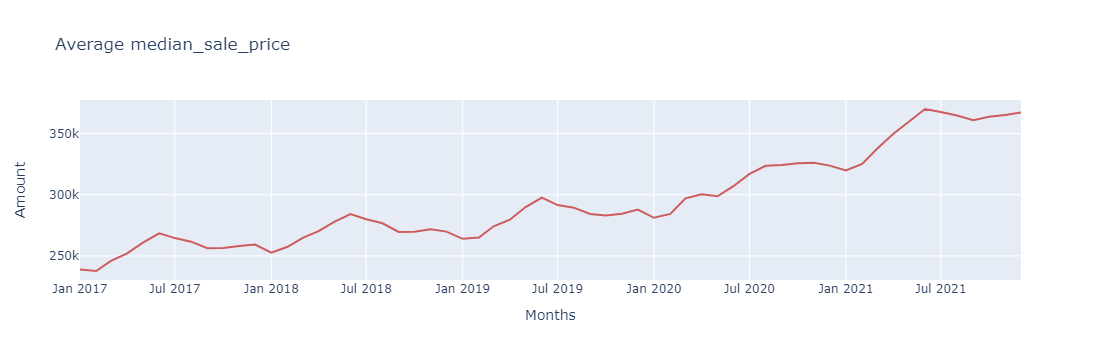

In [14]:
plot_map_state('median_sale_price')

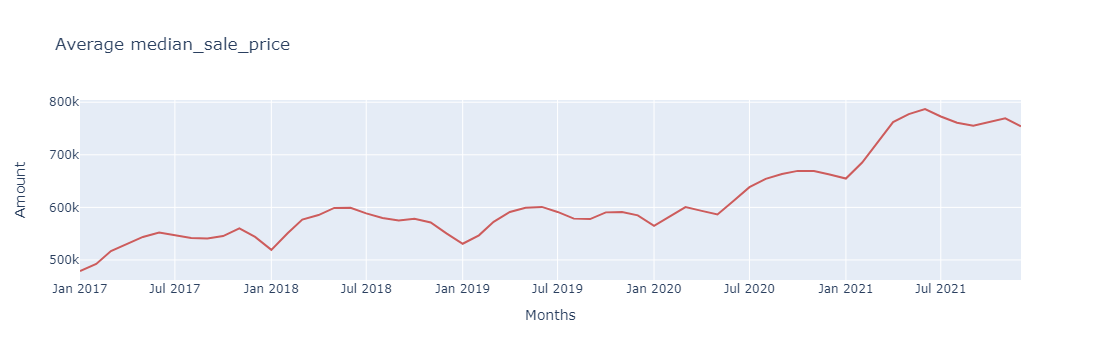

In [15]:
plot_map_state('median_sale_price', state='CA')

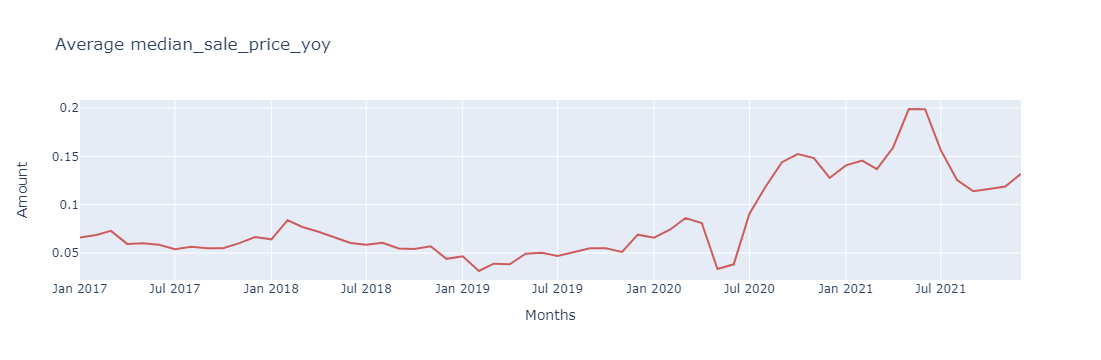

In [16]:
plot_map_state('median_sale_price_yoy')

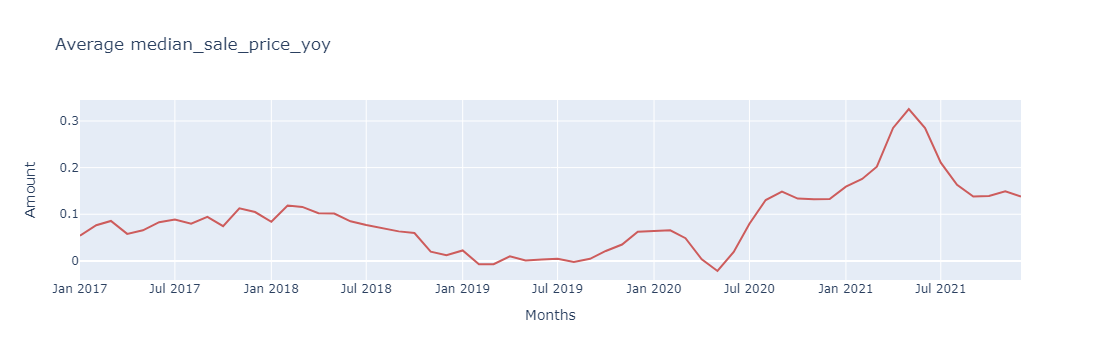

In [17]:
plot_map_state('median_sale_price_yoy', state='CA')

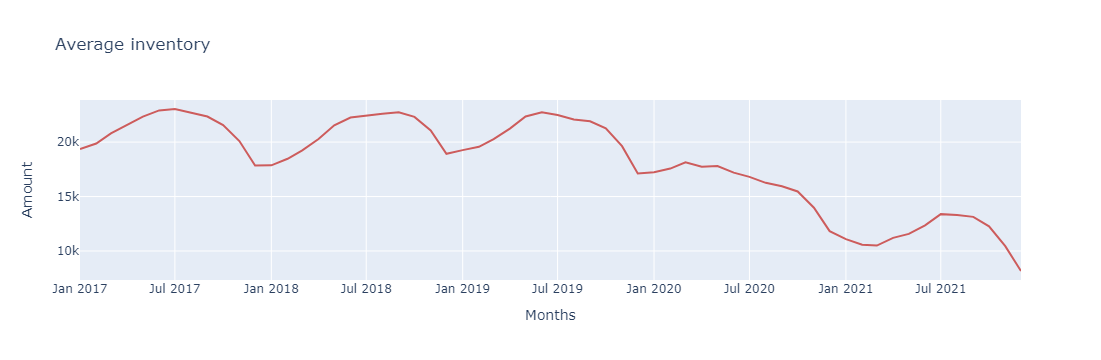

In [18]:
plot_map_state('inventory')

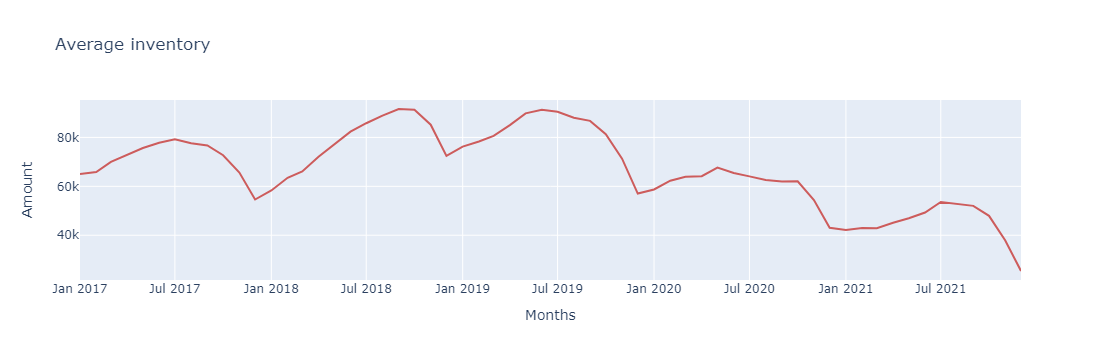

In [19]:
plot_map_state('inventory', state='CA')

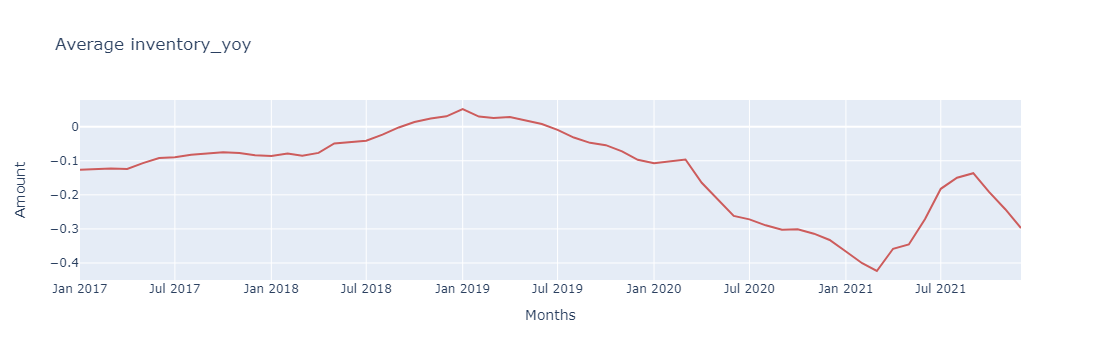

In [20]:
plot_map_state('inventory_yoy')

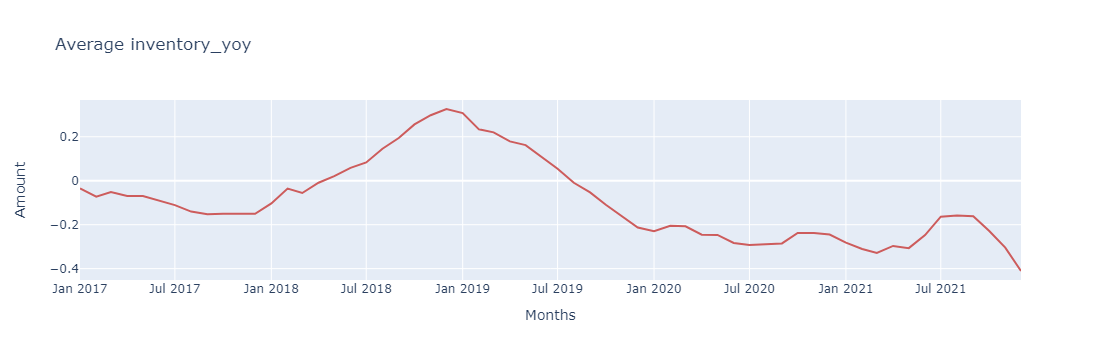

In [21]:
plot_map_state('inventory_yoy', state='CA')